# SGEMM GPU kernel performance dataset (1st Dataset)

## K Nearest Neighbors (KNN)

#### The parameter that I'm tuning are

- K-value (no of nearest neighbors)



In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [241]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [463]:
data = pd.read_csv('sgemm_product.csv')

In [456]:
data = data.head(10000)

In [457]:
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4

In [458]:
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

In [459]:
x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

In [460]:
print(x.shape)
print(type(x))
print(y.shape)
print(type(y))

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
(10000,)
<class 'pandas.core.series.Series'>


In [461]:
median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0

In [462]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime,Mean_Runtime_C
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,1.0


In [250]:
data = data.drop(['Mean_Runtime'], axis = 1)

In [251]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime_C
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [252]:
x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

In [253]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [255]:
print(x.mean(axis = 0))

[ 0.00000000e+00  1.36424205e-16  4.54747351e-17  1.81898940e-16
 -9.09494702e-17  1.36424205e-16 -1.08002496e-16  1.13686838e-17
 -1.30739863e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [256]:
print(x.std(axis = 0))

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import time

In [258]:
k_range = list(range(1, 51))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5835999999999999, 0.6211, 0.6310999999999999, 0.6252, 0.6518999999999999, 0.6446000000000001, 0.6714, 0.6611, 0.6759000000000001, 0.6733, 0.6772, 0.6804, 0.6798, 0.6742999999999999, 0.6733, 0.6677, 0.6704000000000001, 0.6686, 0.6681, 0.6697, 0.663, 0.6614000000000001, 0.6626000000000001, 0.6632, 0.6654, 0.6674, 0.6738, 0.6769000000000001, 0.6791, 0.6829, 0.6873, 0.6883000000000001, 0.6914, 0.6897, 0.6890000000000001, 0.6902000000000001, 0.6918, 0.6899, 0.6900999999999999, 0.689, 0.6869000000000001, 0.6848000000000001, 0.6862, 0.6861, 0.6839000000000001, 0.6842, 0.6837000000000001, 0.6826000000000001, 0.6857, 0.6850000000000002]


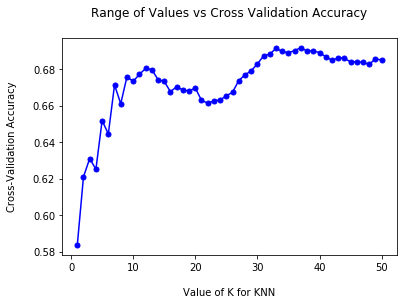

In [259]:
plt.plot(k_range, k_scores,  marker='o', markersize=5,color='blue');
plt.title ('Range of Values vs Cross Validation Accuracy\n');
plt.xlabel('\nValue of K for KNN');
plt.ylabel('Cross-Validation Accuracy\n');

In [260]:
knn = KNeighborsClassifier(n_neighbors = 33)    
scores_train = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
scores_test = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy') 
print(scores_train.mean())
print(scores_test.mean())

0.8537142857142858
0.8243333333333334


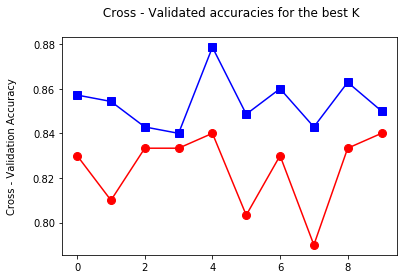

In [261]:
plt.plot(scores_train,  marker='s', markersize=8,color='blue', label = 'train')
plt.plot(scores_test,  marker='o', markersize=8,color='red', label = 'test');
plt.title(' Cross - Validated accuracies for the best K\n');
plt.ylabel('Cross - Validation Accuracy\n');


In [262]:
knn = KNeighborsClassifier(n_neighbors = 33)  
model = knn.fit(x_train,y_train)
train_scores = knn.predict(x_train)
test_scores = knn.predict(x_test)    
print(train_scores)
print(test_scores)

[0. 1. 0. ... 0. 1. 1.]
[0. 1. 0. ... 1. 0. 1.]


### Classification Report

In [264]:
print(classification_report(y_test, test_scores))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1479
         1.0       0.88      0.84      0.86      1521

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



### Confusion Matrix

In [265]:
print(confusion_matrix(y_test,test_scores))

[[1313  166]
 [ 245 1276]]


## Artificial Neural Network

#### The parameters that I'm tuning are






- The activation function (ReLU, Sigmoid and Tanh)


- The sample size (no of observations - (5000, 25000, 50000) 


- The number of hidden layers - (1,2,3)



- The number of nodes in hidden layers (8,12,16)




### Tuning Activation Function

In [394]:
data = pd.read_csv('sgemm_product.csv')
data = data.head(10000)
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0
data = data.drop(['Mean_Runtime'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x.mean(axis = 0))
print(x.std(axis = 0))

model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


[ 0.00000000e+00  1.36424205e-16  4.54747351e-17  1.81898940e-16
 -9.09494702e-17  1.36424205e-16 -1.08002496e-16  1.13686838e-17
 -1.30739863e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 78us/step - loss: 5.6865 - accuracy: 0.4953 - val_loss: 5.0375 - val_accuracy: 0.4870
Epoch 2/100
7000/7000 [==============================] - 0s 46us/step - loss: 4.1200 - accuracy: 0.5140 - val_loss: 3.6447 - val_accuracy: 0.5150
Epoch 3/100
7000/7000 [==============================] - 0s 42us/step - loss: 2.8245 - accuracy: 0.5421 - val_loss: 2.4426 - val_accuracy: 0.5380
Epoch 4/100
7000/7000 [==============================] - 0s 41us/step - loss: 2.2614 - accuracy: 0.5676 - val_loss: 2.1405 - val_accuracy: 0.5640
Epoch 5/100
7000/7000 [==============================] - 0s 38us/step - loss: 1.9606 - accuracy

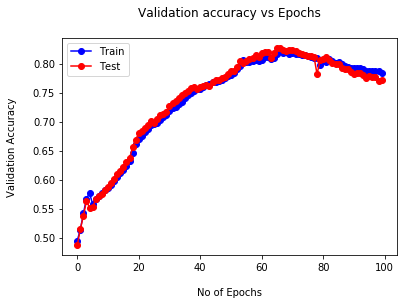

In [395]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'], marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

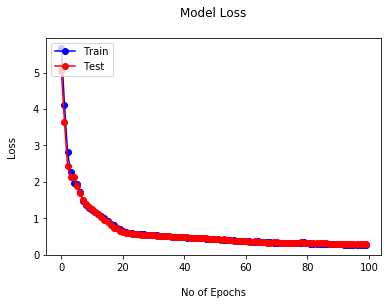

In [396]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], marker='o',markersize=6,color='blue' )
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [397]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'tanh'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 84us/step - loss: 4.7242 - accuracy: 0.4017 - val_loss: 3.0244 - val_accuracy: 0.4693
Epoch 2/100
7000/7000 [==============================] - 0s 45us/step - loss: 2.3975 - accuracy: 0.5023 - val_loss: 1.6934 - val_accuracy: 0.5513
Epoch 3/100
7000/7000 [==============================] - 0s 38us/step - loss: 1.5769 - accuracy: 0.5471 - val_loss: 1.2478 - val_accuracy: 0.5820
Epoch 4/100
7000/7000 [==============================] - 0s 27us/step - loss: 1.1931 - accuracy: 0.5670 - val_loss: 0.9483 - val_accuracy: 0.5933
Epoch 5/100
7000/7000 [==============================] - 0s 32us/step - loss: 0.9521 - accuracy: 0.5789 - val_loss: 0.8829 - val_accuracy: 0.6050
Epoch 6/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.8752 - accuracy: 0.5947 - val_loss: 0.8303 - val_accuracy: 0.6237
Epoch 7/100
7000/7000 [==============================] - 0s 42us/step - loss

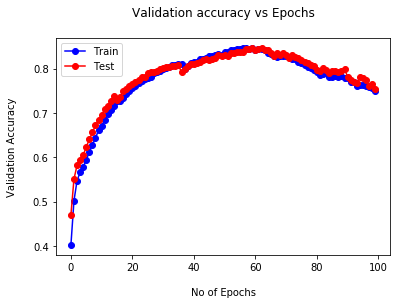

In [398]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

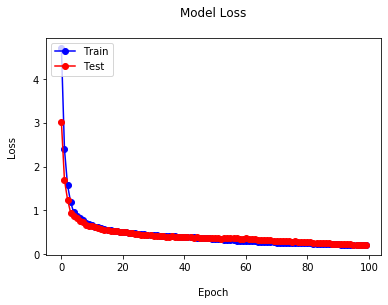

In [399]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [400]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 0s 64us/step - loss: 0.5850 - accuracy: 0.6981 - val_loss: 0.5157 - val_accuracy: 0.7607
Epoch 2/100
7000/7000 [==============================] - 0s 41us/step - loss: 0.4910 - accuracy: 0.7740 - val_loss: 0.4434 - val_accuracy: 0.7963
Epoch 3/100
7000/7000 [==============================] - 0s 40us/step - loss: 0.4330 - accuracy: 0.8053 - val_loss: 0.3966 - val_accuracy: 0.8193
Epoch 4/100
7000/7000 [==============================] - 0s 42us/step - loss: 0.3922 - accuracy: 0.8253 - val_loss: 0.3629 - val_accuracy: 0.8400
Epoch 5/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.3600 - accuracy: 0.8424 - val_loss: 0.3339 - val_accuracy: 0.8573
Epoch 6/100
7000/7000 [==============================] - 0s 39us/step - loss: 0.3327 - accuracy: 0.8569 - val_loss: 0.3086 - val_accuracy: 0.8693
Epoch 7/100
7000/7000 [==============================] - 0s 39us/step - loss

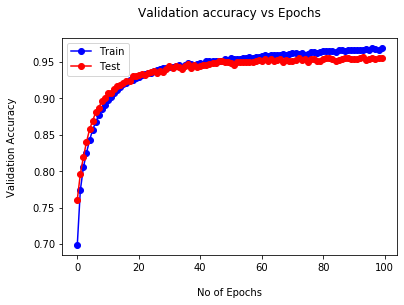

In [401]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

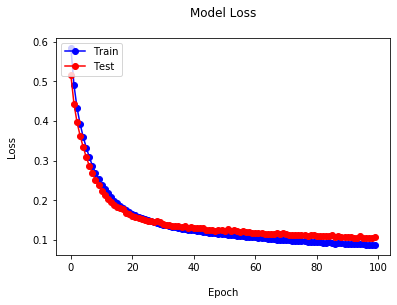

In [402]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### After observing the validation accuracies from the result, I have decided to chose `sigmoid` as my activation function in the output layer

### Tuning Sample Size

In [403]:
data = pd.read_csv('sgemm_product.csv')
data = data.head(25000)
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0
data = data.drop(['Mean_Runtime'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x.mean(axis = 0))
print(x.std(axis = 0))

model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


[-5.00222086e-17  1.81898940e-17 -3.13775672e-16  7.73070497e-17
  6.36646291e-17 -2.27373675e-17 -1.46656021e-16  1.69251280e-16
  2.12594387e-16  9.54969437e-17 -6.49791332e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 1s 54us/step - loss: 0.6299 - accuracy: 0.6404 - val_loss: 0.5405 - val_accuracy: 0.7331
Epoch 2/100
17500/17500 [==============================] - 1s 40us/step - loss: 0.4733 - accuracy: 0.7756 - val_loss: 0.4256 - val_accuracy: 0.7991
Epoch 3/100
17500/17500 [==============================] - 1s 43us/step - loss: 0.3840 - accuracy: 0.8232 - val_loss: 0.3578 - val_accuracy: 0.8376
Epoch 4/100
17500/17500 [==============================] - 1s 56us/step - loss: 0.3282 - accuracy: 0.8555 - val_loss: 0.3171 - val_accuracy: 0.8609
Epoch 5/100
17500/17500 [==============================] - 1s 48us/step - loss: 0.2958

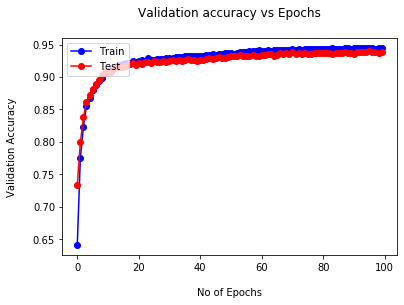

In [404]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

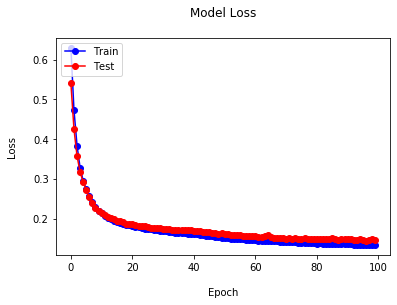

In [405]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [406]:
data = pd.read_csv('sgemm_product.csv')
data = data.head(50000)
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0
data = data.drop(['Mean_Runtime'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x.mean(axis = 0))
print(x.std(axis = 0))

model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


[ 2.77395884e-16  3.72892828e-16 -2.68300937e-16  1.81898940e-17
  1.38697942e-16  2.61479727e-16 -2.72848411e-17 -2.41300313e-16
  1.25055521e-16  9.66338121e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 2s 54us/step - loss: 0.5823 - accuracy: 0.6740 - val_loss: 0.4254 - val_accuracy: 0.8111
Epoch 2/100
35000/35000 [==============================] - 2s 44us/step - loss: 0.3633 - accuracy: 0.8395 - val_loss: 0.3112 - val_accuracy: 0.8666
Epoch 3/100
35000/35000 [==============================] - 2s 45us/step - loss: 0.2945 - accuracy: 0.8708 - val_loss: 0.2690 - val_accuracy: 0.8872
Epoch 4/100
35000/35000 [==============================] - 1s 41us/step - loss: 0.2615 - accuracy: 0.8885 - val_loss: 0.2469 - val_accuracy: 0.8990
Epoch 5/100
35000/35000 [==============================] - 2s 45us/step - loss: 0.241

Epoch 54/100
35000/35000 [==============================] - 2s 52us/step - loss: 0.1447 - accuracy: 0.9404 - val_loss: 0.1464 - val_accuracy: 0.9389
Epoch 55/100
35000/35000 [==============================] - 2s 48us/step - loss: 0.1442 - accuracy: 0.9408 - val_loss: 0.1435 - val_accuracy: 0.9409
Epoch 56/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1446 - accuracy: 0.9409 - val_loss: 0.1459 - val_accuracy: 0.9387
Epoch 57/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1434 - accuracy: 0.9413 - val_loss: 0.1447 - val_accuracy: 0.9401
Epoch 58/100
35000/35000 [==============================] - 1s 39us/step - loss: 0.1434 - accuracy: 0.9411 - val_loss: 0.1429 - val_accuracy: 0.9386
Epoch 59/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.1424 - accuracy: 0.9409 - val_loss: 0.1462 - val_accuracy: 0.9385
Epoch 60/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1429 - accuracy: 0.9406

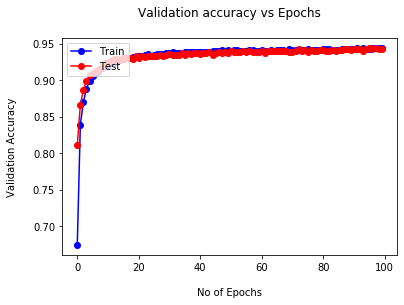

In [407]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

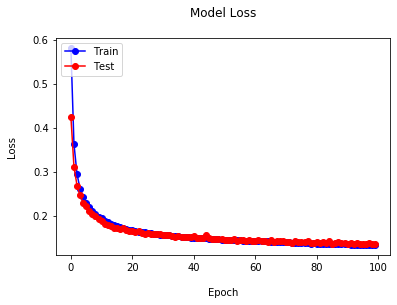

In [408]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### After observing the validation accuracies with various `sample size` including `10000`, `25000`, `50000`, I was able to achive the maximum for `50000` observations. So I have decided to move ahead with 50000 no.of observations in my dataset

### Tuning no. of hidden layers

In [409]:
data = pd.read_csv('sgemm_product.csv')
data = data.head(50000)
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0
data = data.drop(['Mean_Runtime'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x.mean(axis = 0))
print(x.std(axis = 0))

model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


[ 2.77395884e-16  3.72892828e-16 -2.68300937e-16  1.81898940e-17
  1.38697942e-16  2.61479727e-16 -2.72848411e-17 -2.41300313e-16
  1.25055521e-16  9.66338121e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 2s 54us/step - loss: 0.5710 - accuracy: 0.6821 - val_loss: 0.4305 - val_accuracy: 0.7889
Epoch 2/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.3642 - accuracy: 0.8283 - val_loss: 0.2984 - val_accuracy: 0.8652
Epoch 3/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.2777 - accuracy: 0.8777 - val_loss: 0.2486 - val_accuracy: 0.8946
Epoch 4/100
35000/35000 [==============================] - 2s 44us/step - loss: 0.2350 - accuracy: 0.8992 - val_loss: 0.2114 - val_accuracy: 0.9096
Epoch 5/100
35000/35000 [==============================] - 2s 48us/step - loss: 0.205

Epoch 54/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.1113 - accuracy: 0.9549 - val_loss: 0.1146 - val_accuracy: 0.9540
Epoch 55/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1112 - accuracy: 0.9545 - val_loss: 0.1165 - val_accuracy: 0.9531
Epoch 56/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1106 - accuracy: 0.9554 - val_loss: 0.1155 - val_accuracy: 0.9529
Epoch 57/100
35000/35000 [==============================] - 4s 100us/step - loss: 0.1108 - accuracy: 0.9548 - val_loss: 0.1138 - val_accuracy: 0.9545
Epoch 58/100
35000/35000 [==============================] - 2s 52us/step - loss: 0.1106 - accuracy: 0.9554 - val_loss: 0.1148 - val_accuracy: 0.9557
Epoch 59/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1105 - accuracy: 0.9553 - val_loss: 0.1149 - val_accuracy: 0.9528
Epoch 60/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1101 - accuracy: 0.955

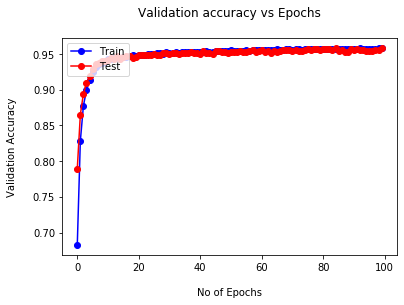

In [410]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'], marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

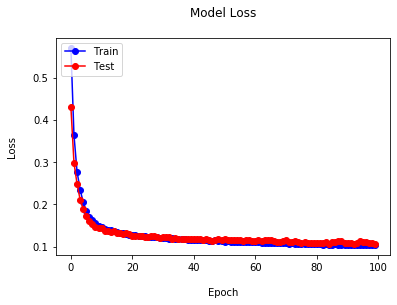

In [411]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [412]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 1s 41us/step - loss: 0.5363 - accuracy: 0.7105 - val_loss: 0.4068 - val_accuracy: 0.8081
Epoch 2/100
35000/35000 [==============================] - 1s 41us/step - loss: 0.3523 - accuracy: 0.8429 - val_loss: 0.3148 - val_accuracy: 0.8602
Epoch 3/100
35000/35000 [==============================] - 1s 41us/step - loss: 0.2904 - accuracy: 0.8720 - val_loss: 0.2729 - val_accuracy: 0.8804
Epoch 4/100
35000/35000 [==============================] - 1s 39us/step - loss: 0.2633 - accuracy: 0.8856 - val_loss: 0.2517 - val_accuracy: 0.8898
Epoch 5/100
35000/35000 [==============================] - 1s 42us/step - loss: 0.2432 - accuracy: 0.8957 - val_loss: 0.2309 - val_accuracy: 0.8989
Epoch 6/100
35000/35000 [==============================] - 1s 39us/step - loss: 0.2245 - accuracy: 0.9048 - val_loss: 0.2140 - val_accuracy: 0.9117
Epoch 7/100
35000/35000 [==============================] - 1s 

Epoch 56/100
35000/35000 [==============================] - 2s 55us/step - loss: 0.1200 - accuracy: 0.9508 - val_loss: 0.1225 - val_accuracy: 0.9485
Epoch 57/100
35000/35000 [==============================] - 2s 52us/step - loss: 0.1198 - accuracy: 0.9505 - val_loss: 0.1233 - val_accuracy: 0.9501
Epoch 58/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1199 - accuracy: 0.9500 - val_loss: 0.1244 - val_accuracy: 0.9476
Epoch 59/100
35000/35000 [==============================] - 2s 51us/step - loss: 0.1202 - accuracy: 0.9505 - val_loss: 0.1207 - val_accuracy: 0.9496
Epoch 60/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1188 - accuracy: 0.9512 - val_loss: 0.1205 - val_accuracy: 0.9513
Epoch 61/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1183 - accuracy: 0.9519 - val_loss: 0.1275 - val_accuracy: 0.9470
Epoch 62/100
35000/35000 [==============================] - 2s 54us/step - loss: 0.1185 - accuracy: 0.9508

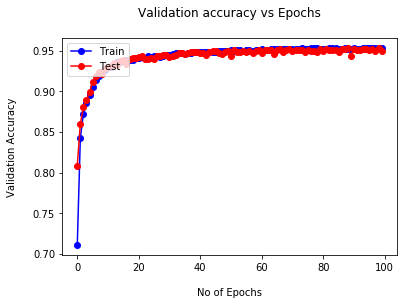

In [413]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

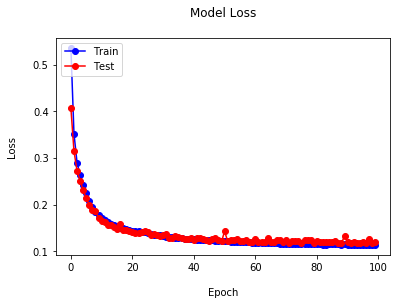

In [414]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'], marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### After fixing the `activation function = sigmoid`,` no of observations = 50000`, I have observed the validation accuracies of different hidden layers including 1, 2 and 3 and observed that 2 hidden layers are giving the highest validation accuracy

### Tuning no.of nodes in hidden layers

In [415]:
data = pd.read_csv('sgemm_product.csv')
data = data.head(50000)
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime']

median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_C'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_C'] = 0
data = data.drop(['Mean_Runtime'], axis = 1)

x = data.iloc[:,0:-1]
y = data['Mean_Runtime_C']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x.mean(axis = 0))
print(x.std(axis = 0))

model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)


[ 2.77395884e-16  3.72892828e-16 -2.68300937e-16  1.81898940e-17
  1.38697942e-16  2.61479727e-16 -2.72848411e-17 -2.41300313e-16
  1.25055521e-16  9.66338121e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 2s 54us/step - loss: 0.5436 - accuracy: 0.7114 - val_loss: 0.4039 - val_accuracy: 0.8161
Epoch 2/100
35000/35000 [==============================] - 2s 46us/step - loss: 0.3615 - accuracy: 0.8388 - val_loss: 0.3148 - val_accuracy: 0.8654
Epoch 3/100
35000/35000 [==============================] - 1s 42us/step - loss: 0.2941 - accuracy: 0.8715 - val_loss: 0.2680 - val_accuracy: 0.8839
Epoch 4/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.2584 - accuracy: 0.8884 - val_loss: 0.2396 - val_accuracy: 0.8987
Epoch 5/100
35000/35000 [==============================] - 2s 44us/step - loss: 0.233

Epoch 54/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1389 - accuracy: 0.9422 - val_loss: 0.1359 - val_accuracy: 0.9437
Epoch 55/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1377 - accuracy: 0.9435 - val_loss: 0.1436 - val_accuracy: 0.9399
Epoch 56/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.1386 - accuracy: 0.9435 - val_loss: 0.1380 - val_accuracy: 0.9429
Epoch 57/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1375 - accuracy: 0.9437 - val_loss: 0.1351 - val_accuracy: 0.9435
Epoch 58/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1379 - accuracy: 0.9429 - val_loss: 0.1339 - val_accuracy: 0.9435
Epoch 59/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1366 - accuracy: 0.9432 - val_loss: 0.1375 - val_accuracy: 0.9433
Epoch 60/100
35000/35000 [==============================] - 2s 52us/step - loss: 0.1371 - accuracy: 0.9432

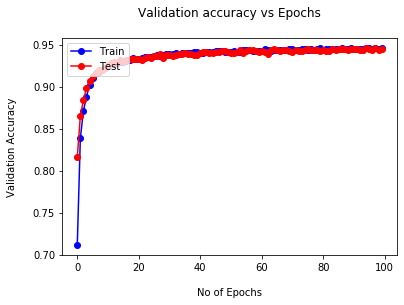

In [416]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

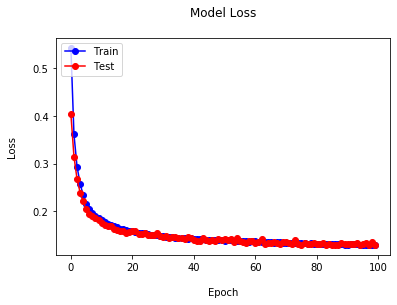

In [417]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [418]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 2s 55us/step - loss: 0.5644 - accuracy: 0.7110 - val_loss: 0.4370 - val_accuracy: 0.7845
Epoch 2/100
35000/35000 [==============================] - 2s 46us/step - loss: 0.3518 - accuracy: 0.8413 - val_loss: 0.2891 - val_accuracy: 0.8732
Epoch 3/100
35000/35000 [==============================] - 2s 51us/step - loss: 0.2691 - accuracy: 0.8879 - val_loss: 0.2428 - val_accuracy: 0.9032
Epoch 4/100
35000/35000 [==============================] - 2s 46us/step - loss: 0.2360 - accuracy: 0.9041 - val_loss: 0.2189 - val_accuracy: 0.9127
Epoch 5/100
35000/35000 [==============================] - 2s 51us/step - loss: 0.2169 - accuracy: 0.9123 - val_loss: 0.2015 - val_accuracy: 0.9209
Epoch 6/100
35000/35000 [==============================] - 2s 52us/step - loss: 0.2028 - accuracy: 0.9183 - val_loss: 0.1901 - val_accuracy: 0.9256
Epoch 7/100
35000/35000 [==============================] - 2s 

Epoch 56/100
35000/35000 [==============================] - 2s 51us/step - loss: 0.1190 - accuracy: 0.9501 - val_loss: 0.1226 - val_accuracy: 0.9481
Epoch 57/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1178 - accuracy: 0.9501 - val_loss: 0.1249 - val_accuracy: 0.9463
Epoch 58/100
35000/35000 [==============================] - 2s 48us/step - loss: 0.1194 - accuracy: 0.9501 - val_loss: 0.1250 - val_accuracy: 0.9467
Epoch 59/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.1187 - accuracy: 0.9499 - val_loss: 0.1202 - val_accuracy: 0.9483
Epoch 60/100
35000/35000 [==============================] - 2s 44us/step - loss: 0.1184 - accuracy: 0.9501 - val_loss: 0.1235 - val_accuracy: 0.9476
Epoch 61/100
35000/35000 [==============================] - 2s 49us/step - loss: 0.1176 - accuracy: 0.9499 - val_loss: 0.1236 - val_accuracy: 0.9484
Epoch 62/100
35000/35000 [==============================] - 2s 50us/step - loss: 0.1184 - accuracy: 0.9506

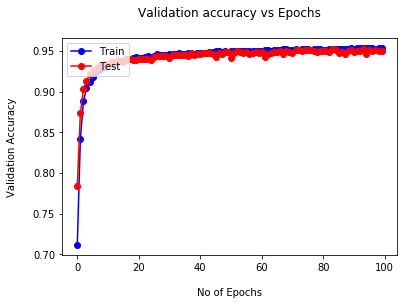

In [419]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

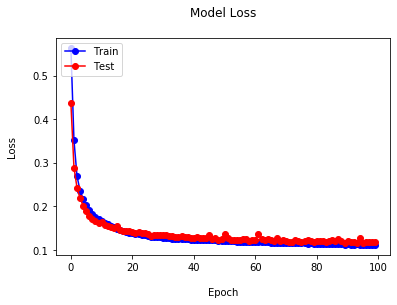

In [420]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [421]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 2s 59us/step - loss: 0.5355 - accuracy: 0.7279 - val_loss: 0.4254 - val_accuracy: 0.7993
Epoch 2/100
35000/35000 [==============================] - 2s 46us/step - loss: 0.3497 - accuracy: 0.8441 - val_loss: 0.2787 - val_accuracy: 0.8853
Epoch 3/100
35000/35000 [==============================] - 1s 43us/step - loss: 0.2646 - accuracy: 0.8917 - val_loss: 0.2388 - val_accuracy: 0.9045
Epoch 4/100
35000/35000 [==============================] - 1s 40us/step - loss: 0.2365 - accuracy: 0.9052 - val_loss: 0.2204 - val_accuracy: 0.9137
Epoch 5/100
35000/35000 [==============================] - 1s 36us/step - loss: 0.2168 - accuracy: 0.9140 - val_loss: 0.2014 - val_accuracy: 0.9190
Epoch 6/100
35000/35000 [==============================] - 1s 37us/step - loss: 0.2037 - accuracy: 0.9183 - val_loss: 0.1895 - val_accuracy: 0.9231
Epoch 7/100
35000/35000 [==============================] - 1s 

Epoch 56/100
35000/35000 [==============================] - 1s 42us/step - loss: 0.1052 - accuracy: 0.9560 - val_loss: 0.1090 - val_accuracy: 0.9540
Epoch 57/100
35000/35000 [==============================] - 2s 47us/step - loss: 0.1052 - accuracy: 0.9558 - val_loss: 0.1073 - val_accuracy: 0.9547
Epoch 58/100
35000/35000 [==============================] - 1s 42us/step - loss: 0.1051 - accuracy: 0.9561 - val_loss: 0.1143 - val_accuracy: 0.9529
Epoch 59/100
35000/35000 [==============================] - 1s 41us/step - loss: 0.1048 - accuracy: 0.9565 - val_loss: 0.1081 - val_accuracy: 0.9552
Epoch 60/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1050 - accuracy: 0.9565 - val_loss: 0.1138 - val_accuracy: 0.9525
Epoch 61/100
35000/35000 [==============================] - 2s 53us/step - loss: 0.1044 - accuracy: 0.9560 - val_loss: 0.1074 - val_accuracy: 0.9553
Epoch 62/100
35000/35000 [==============================] - 2s 46us/step - loss: 0.1039 - accuracy: 0.9566

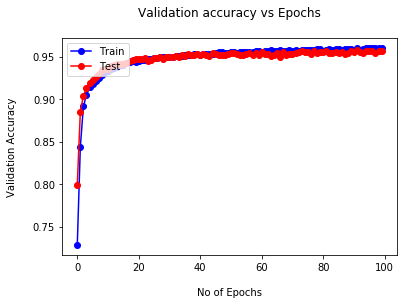

In [422]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

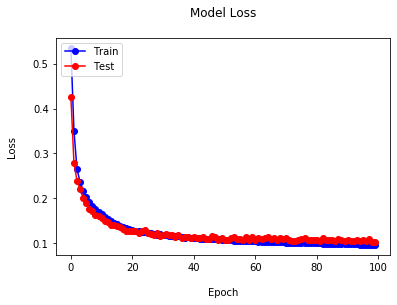

In [423]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### From the result, 12 nodes in both 1st and 2nd hidden layers are giving me the best validation accurcy.

## Final Model Parameters

- No. of observations = 50000


- Activation function in the output layer = Sigmoid


- No. of hidden layers in the neural network = 2 


- No. of nodes in each hidden layer = 12



In [424]:
y_pred = model.predict(x_test)
y_pred = y_pred>0.5

### Best Model Classification Report

In [425]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.96      0.95      0.96      7403
        True       0.95      0.96      0.96      7597

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



#### The best model validation accuracy = 95.92%

# Bank Marketing Dataset

## K Nearest Neighbors (KNN)

In [364]:
bank = pd.read_csv('bank.csv', sep = ';')

In [365]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [366]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [367]:
bank.shape

(4521, 17)

In [368]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [369]:
bank.isnull().any().sum()

0

In [370]:
numerical_features = bank.select_dtypes(include=[np.number])
categorical_features = bank.select_dtypes(include=[np.object])

In [371]:
print('Total number of numerical features =  ', len(numerical_features.columns))
print('Total number of categorical features = ', len(categorical_features.columns))

Total number of numerical features =   7
Total number of categorical features =  10


In [372]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


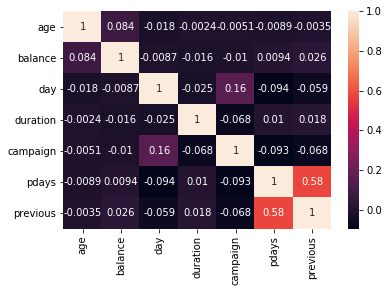

In [373]:
sns.heatmap(bank.corr(), annot = True);

In [374]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [375]:
bank = pd.get_dummies(bank, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'], drop_first= True)

bank.y.replace(('yes', 'no'), (1, 0), inplace=True)

y = bank['y']

x = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_self-employed', 'job_services','job_student', 'job_technician', 'job_unemployed', 'job_unknown',
        'marital_married', 'marital_single', 'education_secondary','education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
        'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug','month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
        'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep','poutcome_other', 'poutcome_success', 'poutcome_unknown']]

x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x.mean(axis = 0))

print(x.std(axis = 0))

[-1.17873712e-16 -1.57164949e-17  2.35747424e-18 -7.62250004e-17
 -6.28659797e-18 -3.88983250e-17  3.92912373e-18 -3.69337631e-17
  4.08628868e-17  4.40061858e-17 -1.96456187e-17 -1.57164949e-17
  1.10015465e-17 -1.41448454e-17 -5.50077323e-18  1.33590207e-17
  2.84861471e-17  1.41448454e-17  7.85824746e-17  6.28659797e-18
 -1.25731959e-17  1.21802836e-16  1.88597939e-17  2.75038661e-18
  1.43413016e-16  5.97226807e-17 -1.10015465e-17  2.67180414e-17
 -3.14329899e-18 -1.57164949e-18  2.35747424e-17  4.08628868e-17
 -6.28659797e-18 -7.85824746e-18 -9.42989696e-18 -7.70108252e-17
  3.61479383e-17  1.80739692e-17 -1.13944588e-17 -1.17873712e-17
  1.57164949e-18 -1.04121779e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [376]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [377]:
k_range = list(range(1, 51))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8679486803805505, 0.888078493426322, 0.8863115122389577, 0.887412823067456, 0.8896261892203402, 0.8900696438687999, 0.8916188048213483, 0.8902899060344996, 0.8891841997304109, 0.8869732755084101, 0.8871940260602864, 0.8871940260602864, 0.8880789818124988, 0.8878577428744456, 0.8880784934263222, 0.8878577428744456, 0.888521459688605, 0.8887431870128347, 0.8891861532751177, 0.8898493817031001, 0.8887436753990114, 0.8889644259508879, 0.8889644259508879, 0.888521459688605, 0.8898488933169235, 0.8891851765027642, 0.890955088007189, 0.8902918595792062, 0.8905130985172593, 0.8889644259508878, 0.8907338490691359, 0.8889644259508879, 0.8907338490691359, 0.8889644259508879, 0.8902918595792064, 0.8887436753990114, 0.889628631151224, 0.8885224364609584, 0.8894073922131707, 0.8885224364609584, 0.8887436753990116, 0.887637480708746, 0.8887436753990116, 0.8880789818124987, 0.8880799585848523, 0.8876365039363925, 0.8874152649983393, 0.8876365039363925, 0.8878577428744456, 0.887194514446463]


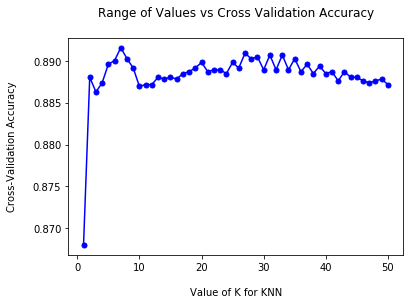

In [378]:
plt.plot(k_range, k_scores,  marker='o', markersize=5,color='blue');
plt.title ('Range of Values vs Cross Validation Accuracy\n');
plt.xlabel('\nValue of K for KNN');
plt.ylabel('Cross-Validation Accuracy\n');

In [379]:
knn = KNeighborsClassifier(n_neighbors = 7)    
scores_train = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
scores_test = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy')
print(scores_train.mean())
print(scores_test.mean())

0.8859012498502576
0.8938943355119824


In [385]:
knn = KNeighborsClassifier(n_neighbors = 7)    
scores_train = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
scores_test = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy') 

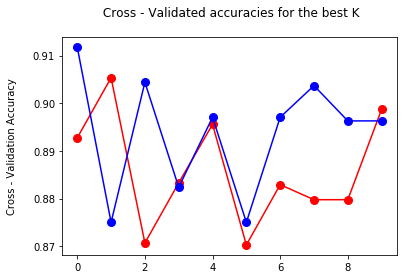

In [390]:
plt.plot(scores_train,  marker='o', markersize=8,color='red', label = 'test');
plt.plot(scores_test,  marker='o', markersize=8,color='blue', label = 'test');
plt.title(' Cross - Validated accuracies for the best K\n');
plt.ylabel('Cross - Validation Accuracy\n');


In [330]:
print(accuracy_score(y_test, test_scores))

0.8828297715549005


In [333]:
print(classification_report(y_test, test_scores))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1205
           1       0.44      0.18      0.25       152

    accuracy                           0.88      1357
   macro avg       0.67      0.57      0.59      1357
weighted avg       0.85      0.88      0.86      1357



## Artificial Neural Network

### Tuning the activation function

In [426]:
bank = pd.read_csv('bank.csv', sep = ';')

bank = pd.get_dummies(bank, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'], drop_first= True)

bank.y.replace(('yes', 'no'), (1, 0), inplace=True)

y = bank['y']

x = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_self-employed', 'job_services','job_student', 'job_technician', 'job_unemployed', 'job_unknown',
        'marital_married', 'marital_single', 'education_secondary','education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
        'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug','month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
        'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep','poutcome_other', 'poutcome_success', 'poutcome_unknown']]

x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [427]:
print(x.shape)
print(y.shape)


(4521, 42)
(4521,)


In [428]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 115us/step - loss: 3.9128 - accuracy: 0.4820 - val_loss: 2.7237 - val_accuracy: 0.6426
Epoch 2/100
3164/3164 [==============================] - 0s 40us/step - loss: 2.3128 - accuracy: 0.6694 - val_loss: 1.9633 - val_accuracy: 0.7450
Epoch 3/100
3164/3164 [==============================] - 0s 45us/step - loss: 1.6480 - accuracy: 0.7699 - val_loss: 1.6292 - val_accuracy: 0.7826
Epoch 4/100
3164/3164 [==============================] - 0s 44us/step - loss: 1.4692 - accuracy: 0.7876 - val_loss: 1.5284 - val_accuracy: 0.7833
Epoch 5/100
3164/3164 [==============================] - 0s 39us/step - loss: 1.3694 - accuracy: 0.7873 - val_loss: 1.4309 - val_accuracy: 0.7959
Epoch 6/100
3164/3164 [==============================] - 0s 42us/step - loss: 1.2666 - accuracy: 0.8050 - val_loss: 1.4123 - val_accuracy: 0.8069
Epoch 7/100
3164/3164 [==============================] - 0s 47us/step - los

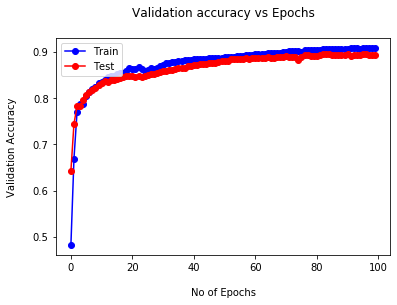

In [429]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

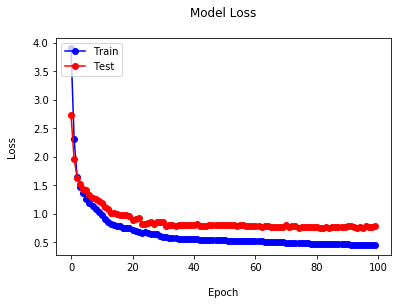

In [430]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [431]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'tanh'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 140us/step - loss: 0.9646 - accuracy: 0.6485 - val_loss: 0.8796 - val_accuracy: 0.7126
Epoch 2/100
3164/3164 [==============================] - 0s 52us/step - loss: 0.8185 - accuracy: 0.7462 - val_loss: 0.8031 - val_accuracy: 0.7730
Epoch 3/100
3164/3164 [==============================] - 0s 52us/step - loss: 0.7657 - accuracy: 0.7826 - val_loss: 0.7916 - val_accuracy: 0.7885
Epoch 4/100
3164/3164 [==============================] - 0s 47us/step - loss: 0.7397 - accuracy: 0.7961 - val_loss: 0.7317 - val_accuracy: 0.7959
Epoch 5/100
3164/3164 [==============================] - 0s 47us/step - loss: 0.7238 - accuracy: 0.7987 - val_loss: 0.7399 - val_accuracy: 0.7996
Epoch 6/100
3164/3164 [==============================] - 0s 42us/step - loss: 0.6955 - accuracy: 0.7993 - val_loss: 0.7176 - val_accuracy: 0.7937
Epoch 7/100
3164/3164 [==============================] - 0s 45us/step - los

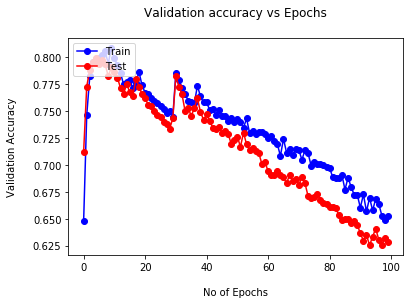

In [432]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

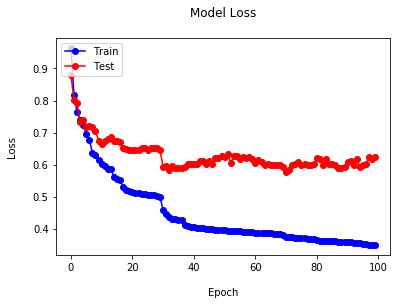

In [433]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [434]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 125us/step - loss: 0.8017 - accuracy: 0.4083 - val_loss: 0.6212 - val_accuracy: 0.7229
Epoch 2/100
3164/3164 [==============================] - 0s 40us/step - loss: 0.5348 - accuracy: 0.8312 - val_loss: 0.4609 - val_accuracy: 0.8880
Epoch 3/100
3164/3164 [==============================] - 0s 41us/step - loss: 0.4168 - accuracy: 0.8837 - val_loss: 0.3772 - val_accuracy: 0.8909
Epoch 4/100
3164/3164 [==============================] - 0s 44us/step - loss: 0.3544 - accuracy: 0.8856 - val_loss: 0.3350 - val_accuracy: 0.8909
Epoch 5/100
3164/3164 [==============================] - 0s 46us/step - loss: 0.3199 - accuracy: 0.8859 - val_loss: 0.3113 - val_accuracy: 0.8917
Epoch 6/100
3164/3164 [==============================] - 0s 49us/step - loss: 0.2975 - accuracy: 0.8878 - val_loss: 0.2970 - val_accuracy: 0.8917
Epoch 7/100
3164/3164 [==============================] - 0s 42us/step - los

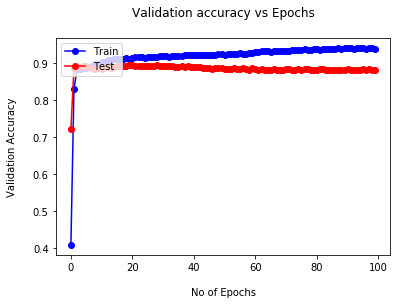

In [435]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

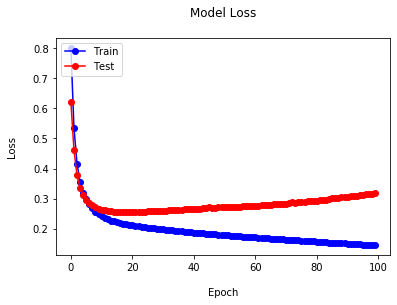

In [436]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### After observing the validation accuracies from the result, I have decided to chose `sigmoid` as my activation function in the output layer

### Tuning no. of hidden layers

In [437]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 144us/step - loss: 0.8622 - accuracy: 0.2604 - val_loss: 0.6827 - val_accuracy: 0.5497
Epoch 2/100
3164/3164 [==============================] - 0s 39us/step - loss: 0.6026 - accuracy: 0.7351 - val_loss: 0.5188 - val_accuracy: 0.8592
Epoch 3/100
3164/3164 [==============================] - 0s 41us/step - loss: 0.4751 - accuracy: 0.8777 - val_loss: 0.4190 - val_accuracy: 0.8887
Epoch 4/100
3164/3164 [==============================] - 0s 40us/step - loss: 0.3887 - accuracy: 0.8853 - val_loss: 0.3511 - val_accuracy: 0.8895
Epoch 5/100
3164/3164 [==============================] - 0s 43us/step - loss: 0.3304 - accuracy: 0.8891 - val_loss: 0.3126 - val_accuracy: 0.8946
Epoch 6/100
3164/3164 [==============================] - 0s 45us/step - loss: 0.2944 - accuracy: 0.8916 - val_loss: 0.2915 - val_accuracy: 0.8939
Epoch 7/100
3164/3164 [==============================] - 0s 47us/step - los

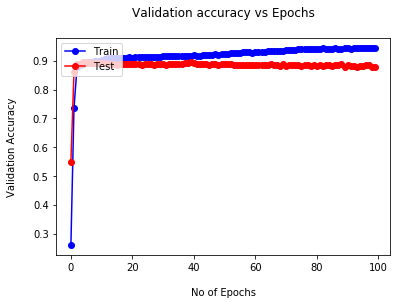

In [438]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

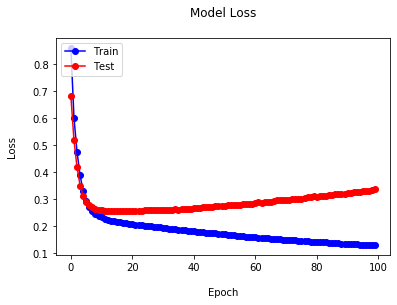

In [439]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [440]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 137us/step - loss: 0.4508 - accuracy: 0.8834 - val_loss: 0.3856 - val_accuracy: 0.8880
Epoch 2/100
3164/3164 [==============================] - 0s 48us/step - loss: 0.3689 - accuracy: 0.8834 - val_loss: 0.3437 - val_accuracy: 0.8880
Epoch 3/100
3164/3164 [==============================] - 0s 50us/step - loss: 0.3357 - accuracy: 0.8834 - val_loss: 0.3230 - val_accuracy: 0.8880
Epoch 4/100
3164/3164 [==============================] - 0s 53us/step - loss: 0.3149 - accuracy: 0.8834 - val_loss: 0.3093 - val_accuracy: 0.8880
Epoch 5/100
3164/3164 [==============================] - 0s 35us/step - loss: 0.2994 - accuracy: 0.8834 - val_loss: 0.2987 - val_accuracy: 0.8880
Epoch 6/100
3164/3164 [==============================] - 0s 40us/step - loss: 0.2862 - accuracy: 0.8834 - val_loss: 0.2892 - val_accuracy: 0.8880
Epoch 7/100
3164/3164 [==============================] - 0s 47us/step - los

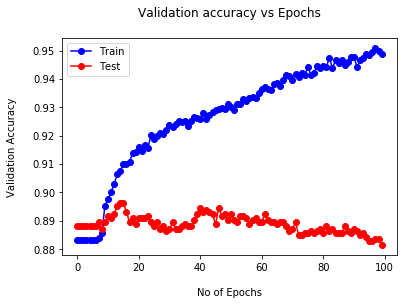

In [441]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

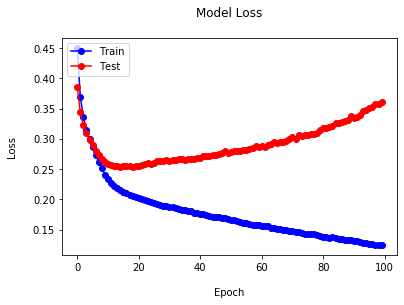

In [442]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [443]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 1s 182us/step - loss: 0.5990 - accuracy: 0.7070 - val_loss: 0.4215 - val_accuracy: 0.8858
Epoch 2/100
3164/3164 [==============================] - 0s 40us/step - loss: 0.3736 - accuracy: 0.8834 - val_loss: 0.3203 - val_accuracy: 0.8880
Epoch 3/100
3164/3164 [==============================] - 0s 55us/step - loss: 0.3148 - accuracy: 0.8840 - val_loss: 0.2849 - val_accuracy: 0.8887
Epoch 4/100
3164/3164 [==============================] - 0s 48us/step - loss: 0.2816 - accuracy: 0.8859 - val_loss: 0.2658 - val_accuracy: 0.8873
Epoch 5/100
3164/3164 [==============================] - 0s 54us/step - loss: 0.2597 - accuracy: 0.8922 - val_loss: 0.2577 - val_accuracy: 0.8902
Epoch 6/100
3164/3164 [==============================] - 0s 41us/step - loss: 0.2463 - accuracy: 0.9023 - val_loss: 0.2534 - val_accuracy: 0.8865
Epoch 7/100
3164/3164 [==============================] - 0s 44us/step - los

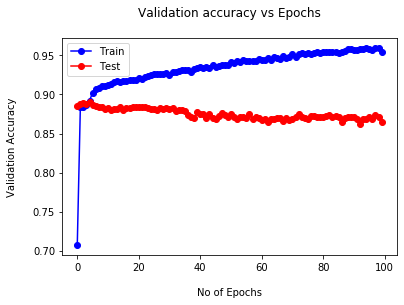

In [444]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

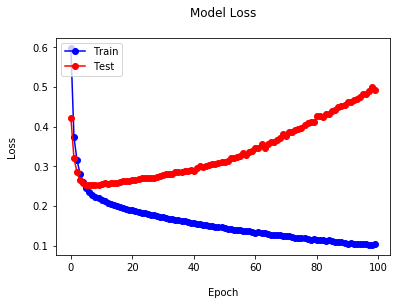

In [445]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### After fixing the `activation function = sigmoid`, I have observed the validation accuracies of different hidden layers including 1, 2 and 3 and observed that 1 hidden layer is giving the highest validation accuracy

### Tuning no.of nodes in hidden layers

In [446]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 117us/step - loss: 1.1222 - accuracy: 0.1558 - val_loss: 0.8865 - val_accuracy: 0.2712
Epoch 2/100
3164/3164 [==============================] - 0s 38us/step - loss: 0.7674 - accuracy: 0.4441 - val_loss: 0.6914 - val_accuracy: 0.6264
Epoch 3/100
3164/3164 [==============================] - 0s 42us/step - loss: 0.6322 - accuracy: 0.7611 - val_loss: 0.5934 - val_accuracy: 0.8460
Epoch 4/100
3164/3164 [==============================] - 0s 43us/step - loss: 0.5492 - accuracy: 0.8764 - val_loss: 0.5217 - val_accuracy: 0.8828
Epoch 5/100
3164/3164 [==============================] - 0s 44us/step - loss: 0.4811 - accuracy: 0.8875 - val_loss: 0.4573 - val_accuracy: 0.8843
Epoch 6/100
3164/3164 [==============================] - 0s 46us/step - loss: 0.4194 - accuracy: 0.8862 - val_loss: 0.3999 - val_accuracy: 0.8880
Epoch 7/100
3164/3164 [==============================] - 0s 43us/step - los

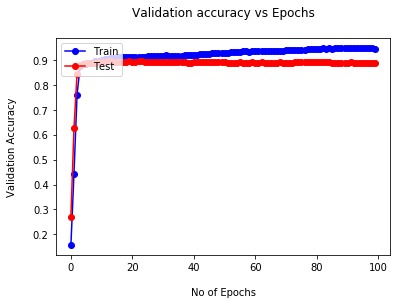

In [447]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

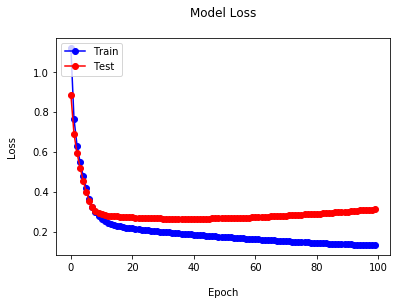

In [448]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [449]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 119us/step - loss: 0.6597 - accuracy: 0.6451 - val_loss: 0.5480 - val_accuracy: 0.8430
Epoch 2/100
3164/3164 [==============================] - 0s 40us/step - loss: 0.4960 - accuracy: 0.8669 - val_loss: 0.4227 - val_accuracy: 0.8880
Epoch 3/100
3164/3164 [==============================] - 0s 42us/step - loss: 0.3966 - accuracy: 0.8827 - val_loss: 0.3544 - val_accuracy: 0.8880
Epoch 4/100
3164/3164 [==============================] - 0s 43us/step - loss: 0.3453 - accuracy: 0.8834 - val_loss: 0.3242 - val_accuracy: 0.8887
Epoch 5/100
3164/3164 [==============================] - 0s 43us/step - loss: 0.3163 - accuracy: 0.8837 - val_loss: 0.3054 - val_accuracy: 0.8880
Epoch 6/100
3164/3164 [==============================] - 0s 45us/step - loss: 0.2948 - accuracy: 0.8856 - val_loss: 0.2928 - val_accuracy: 0.8887
Epoch 7/100
3164/3164 [==============================] - 0s 40us/step - los

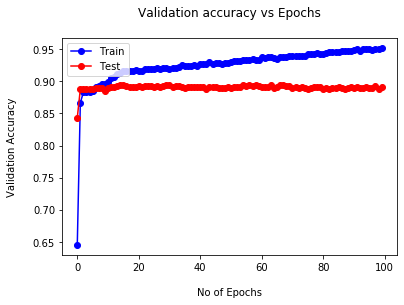

In [450]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'] , marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

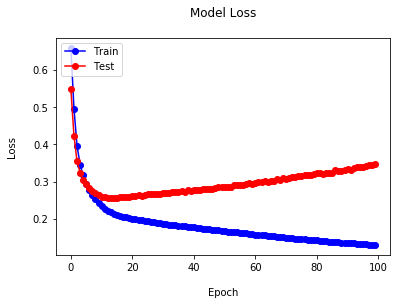

In [451]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [452]:
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 3164 samples, validate on 1357 samples
Epoch 1/100
3164/3164 [==============================] - 0s 145us/step - loss: 0.4828 - accuracy: 0.8262 - val_loss: 0.4047 - val_accuracy: 0.8777
Epoch 2/100
3164/3164 [==============================] - 0s 48us/step - loss: 0.3773 - accuracy: 0.8824 - val_loss: 0.3507 - val_accuracy: 0.8865
Epoch 3/100
3164/3164 [==============================] - 0s 56us/step - loss: 0.3350 - accuracy: 0.8840 - val_loss: 0.3229 - val_accuracy: 0.8858
Epoch 4/100
3164/3164 [==============================] - 0s 50us/step - loss: 0.3087 - accuracy: 0.8875 - val_loss: 0.3068 - val_accuracy: 0.8828
Epoch 5/100
3164/3164 [==============================] - 0s 52us/step - loss: 0.2903 - accuracy: 0.8900 - val_loss: 0.2943 - val_accuracy: 0.8850
Epoch 6/100
3164/3164 [==============================] - 0s 49us/step - loss: 0.2760 - accuracy: 0.8935 - val_loss: 0.2848 - val_accuracy: 0.8873
Epoch 7/100
3164/3164 [==============================] - 0s 52us/step - los

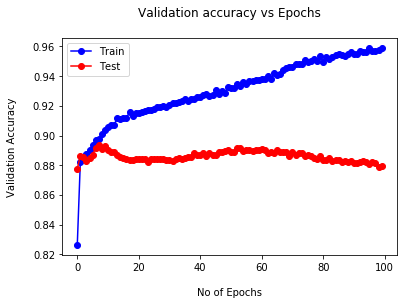

In [453]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker='o',markersize=6,color='blue')
plt.plot(history.history['val_accuracy'],  marker='o',markersize=6,color='red')
plt.title('Validation accuracy vs Epochs\n')
plt.ylabel('Validation Accuracy\n')
plt.xlabel('\nNo of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

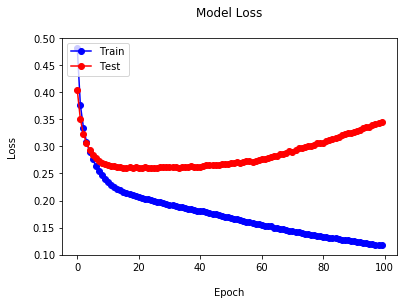

In [454]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],  marker='o',markersize=6,color='blue')
plt.plot(history.history['val_loss'],  marker='o',markersize=6,color='red')
plt.title('Model Loss\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### From the result, 8 nodes in both  hidden layer are giving me the best validation accurcy.

## Final Best Parameters

- No. of observations = 4521


- Activation function in the output layer = Sigmoid


- No. of hidden layers in the neural network = 1


- No. of nodes in the hidden layer = 8

